##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/selected_data.csv')

In [3]:
# Browse dataset
df.head(10)

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,ileave,avg_st,browser_chrome,model_bin,os_bin,CT_bin,PRO,PRO_bin,hour,worktime
0,1.0,Hangzhou,qq,7.3,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,0,NaN,0,others,others,others,ZJ,ZJ,23,0
1,1.0,Guangzhou,chrome,56.0,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,1,921142.371,1,mac,macosx,Guangzhou,BJ,BJ,21,0
2,1.0,Shenzhen,chrome,56.0,ukcontent,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0,2586.546,1,pc,windows,others,GD,GD,1,1
3,1.0,Hangzhou,qq,9.5,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0,30.680,0,pc,windows,others,SH,SH,22,0
4,1.0,Chengdu,safari,9.0,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0,NaN,0,others,others,others,BJ,BJ,5,1
5,1.0,Zhengzhou,chrome,56.0,others,2017-03-08,0011f5066b1c62717255852fdb15a0473a5c2b19,$pageview,6.0,119.57.163.82,...,0,4.170,1,mac,macosx,others,BJ,BJ,21,0
6,0.0,Nonthaburi,chrome,56.0,others,2017-03-06,0012ea1b517e6959354abaa6954711054ec831b9,index_leave,2.0,101.71.245.170,...,1,35.747,1,pc,windows,others,ZJ,ZJ,19,0
7,1.0,Beijing,na,-1.0,others,2017-03-09,002232cd6da95fae1cc9a5fbaa7c2d0e11fbd57b,index_leave,3.0,223.73.25.141,...,1,18.916,0,others,others,Beijing,GD,GD,4,1
8,1.0,NaN,micromessenger,6.5,ukcontent,2017-03-08,00229f012ef316de6efdcbc380ffdb2558e9ff81,$pageview,3.0,223.104.38.131,...,0,NaN,0,others,others,others,BJ,BJ,19,0
9,1.0,Wuhan,qq,6.0,others,2017-03-10,0023b8aa9adf510ef81d0e90e175d809f2bf6059,$pageview,1.0,153.37.200.192,...,0,NaN,0,others,others,others,JS,others,8,1


In [4]:
# Show summary stats
df.describe()

,CN,browser_v,freq,is_fd,is_ft,os_version,pageP,pageS,signup,time,weekend,Ttoend,count,npage,nclick,ileave,avg_st,browser_chrome,hour,worktime
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,5518.000000,5.571000e+03,11708.000000,1.170800e+04,11708.000000,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.00000,7.412000e+03,11708.000000,11708.000000,11708.000000
mean,0.864622,33.023361,5.609242,0.764178,0.229587,7.753071,1.784523,1.009756e+04,0.042450,1.489164e+12,0.139136,2.809726e+07,4.987444,2.554920,1.039716,0.36411,7.209755e+03,0.557824,9.100615,0.653912
std,0.342141,21.660523,10.500759,0.424529,0.420585,2.205608,0.968303,6.525297e+04,0.201621,2.263144e+08,0.346103,1.026529e+08,9.048549,4.609698,2.484745,0.48120,6.471723e+04,0.496666,7.732918,0.475742
min,0.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,3.300000e-02,0.000000,1.488791e+12,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.00000,3.300000e-02,0.000000,0.000000,0.000000
25%,1.000000,9.500000,1.000000,1.000000,0.000000,6.100000,1.000000,7.478000e+00,0.000000,1.488965e+12,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.00000,7.744750e+00,0.000000,3.000000,0.000000
50%,1.000000,45.000000,2.000000,1.000000,0.000000,6.200000,1.000000,2.704500e+01,0.000000,1.489130e+12,0.000000,1.871450e+04,2.000000,1.000000,0.000000,0.00000,2.283800e+01,1.000000,6.000000,1.000000
75%,1.000000,55.000000,5.000000,1.000000,0.000000,10.000000,2.000000,5.896960e+02,0.000000,1.489391e+12,0.000000,4.547025e+05,5.000000,2.000000,1.000000,1.00000,1.839218e+02,1.000000,18.000000,1.000000
max,1.000000,59.000000,254.000000,1.000000,1.000000,10.900000,4.000000,1.749192e+06,1.000000,1.489517e+12,1.000000,7.101324e+08,254.000000,152.000000,69.000000,1.00000,2.918014e+06,1.000000,23.000000,1.000000


## Build Logistic Regression Model

#### Encode categorical columns to numeric values

In [5]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [6]:
col_category = ['model_bin','os_bin','CT_bin','PRO_bin','source','content','medium']

In [7]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [8]:
df_dummies

,model_bin_mac,model_bin_others,model_bin_pc,os_bin_macosx,os_bin_others,os_bin_windows,CT_bin_Beijing,CT_bin_Guangzhou,CT_bin_Shanghai,CT_bin_others,...,PRO_bin_others,source_baidu,source_others,source_sensordata,content_data,content_others,content_ukcontent,medium_cpc,medium_others,medium_ukmedium
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
6,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0


In [9]:
df = df.join(df_dummies)

In [10]:
df.head()

,CN,CT,browser,browser_v,content,day,dist_id,event,freq,ip,...,PRO_bin_others,source_baidu,source_others,source_sensordata,content_data,content_others,content_ukcontent,medium_cpc,medium_others,medium_ukmedium
0,1.0,Hangzhou,qq,7.3,others,2017-03-06,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,formSubmit,6.0,36.23.47.33,...,0,1,0,0,0,1,0,0,1,0
1,1.0,Guangzhou,chrome,56.0,others,2017-03-12,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,index_leave,1.0,111.193.183.253,...,0,1,0,0,0,1,0,1,0,0
2,1.0,Shenzhen,chrome,56.0,ukcontent,2017-03-07,000c46a27ef69fa22b56d253a9c72773338a1686,$pageview,22.0,27.38.250.222,...,0,0,0,1,0,0,1,0,0,1
3,1.0,Hangzhou,qq,9.5,ukcontent,2017-03-12,000ed1dcd942969b458c5b308937c6389c08f999,$pageview,4.0,116.226.32.214,...,0,0,1,0,0,0,1,0,0,1
4,1.0,Chengdu,safari,9.0,others,2017-03-09,00111feff544ef5280a4c7064a362a9ea59c9389,$pageview,1.0,117.136.38.216,...,0,1,0,0,0,1,0,0,1,0


In [11]:
df.columns

Index(['CN', 'CT', 'browser', 'browser_v', 'content', 'day', 'dist_id',
       'event', 'freq', 'ip', 'is_fd', 'is_ft', 'latest_utm_content',
       'latest_utm_m', 'latest_utm_s', 'medium', 'model', 'os', 'os_version',
       'pageP', 'pageS', 'signup', 'source', 'time', 'weekend', 'Ttoend',
       'count', 'npage', 'nclick', 'ileave', 'avg_st', 'browser_chrome',
       'model_bin', 'os_bin', 'CT_bin', 'PRO', 'PRO_bin', 'hour', 'worktime',
       'model_bin_mac', 'model_bin_others', 'model_bin_pc', 'os_bin_macosx',
       'os_bin_others', 'os_bin_windows', 'CT_bin_Beijing', 'CT_bin_Guangzhou',
       'CT_bin_Shanghai', 'CT_bin_others', 'PRO_bin_BJ', 'PRO_bin_GD',
       'PRO_bin_SH', 'PRO_bin_ZJ', 'PRO_bin_others', 'source_baidu',
       'source_others', 'source_sensordata', 'content_data', 'content_others',
       'content_ukcontent', 'medium_cpc', 'medium_others', 'medium_ukmedium'],
      dtype='object')

In [12]:
df['avg_st'] = df['avg_st'].fillna(0)

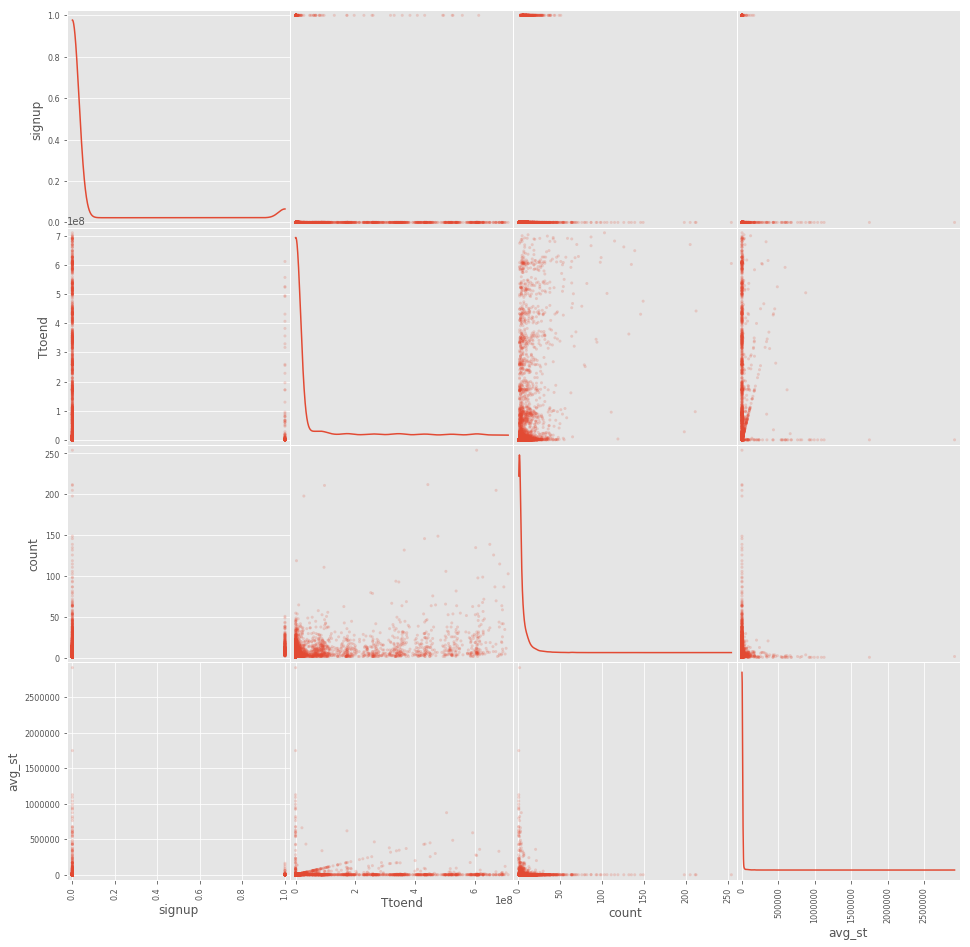

In [152]:
# Use scatter_matrix from Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df[[u'signup', u'Ttoend', u'count',u'avg_st']], 
               alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.savefig('timescatter.png',bbox_inches="tight",dpi=500)
plt.show()

### Define Features and Target

In [135]:
df['log_st'] = np.log((df.avg_st+1)/1000) 

In [136]:
df['log_Ttoend'] = np.log(df.Ttoend+1) 

In [170]:
df['log_ileave'] = np.log(df.ileave+1) 
df['log_npage'] = np.log(df.npage+1) 
df['log_nclick'] = np.log(df.nclick+1) 
#df['log_count'] = np.log(df.count+1) 

In [171]:
selected_features = [#u'freq',
                     u'count',u'worktime',u'weekend',
                     u'log_st',
                     u'model_bin_mac',u'model_bin_others', u'model_bin_pc', u'os_bin_macosx', u'os_bin_others',
                     u'os_bin_windows', u'CT_bin_Beijing', u'CT_bin_Guangzhou',
                     u'CT_bin_Shanghai', u'CT_bin_others', u'PRO_bin_BJ', u'PRO_bin_GD',
                     u'PRO_bin_SH', u'PRO_bin_ZJ', u'PRO_bin_others', u'source_baidu',
                     u'source_others', u'source_others',u'content_data',u'content_others',u'content_ukcontent',
                     u'medium_cpc', u'medium_others', u'medium_ukmedium',
                     u'log_npage', u'log_nclick', u'log_ileave', 
                     u'log_Ttoend',
                     u'is_fd', u'is_ft', u'CN']
target = u'signup'

In [172]:
X = df[selected_features].values
y = df['signup'].values

In [173]:
X.shape

(11708, 35)

#### Let's Train-test split the data!

In [174]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression model using sklearn

In [199]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l1')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [200]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [201]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.951584  0.953647
Accuracy   0.962416  0.964987
Precision  0.651163  0.754717
Recall     0.242075  0.266667
f1-score   0.352941  0.394089


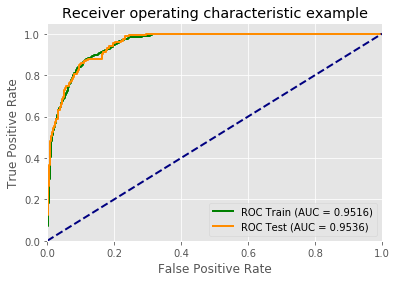

In [203]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

##### recall=tp/(tp+fn): for this problem, sign up rate is low, it is expected that we see low tp compared with fn
##### precision=tp/(tp+fp): this metric is more importatn, low precision might due to small number of data amount

Understanding the Estimated Coefficients

In [204]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
29,log_nclick,3.386154
32,is_fd,0.852149
31,log_Ttoend,0.157232
1,worktime,0.108772
3,log_st,0.104704
13,CT_bin_others,0.104223
0,count,0.047279
15,PRO_bin_GD,0.000000
27,medium_ukmedium,0.000000
25,medium_cpc,0.000000


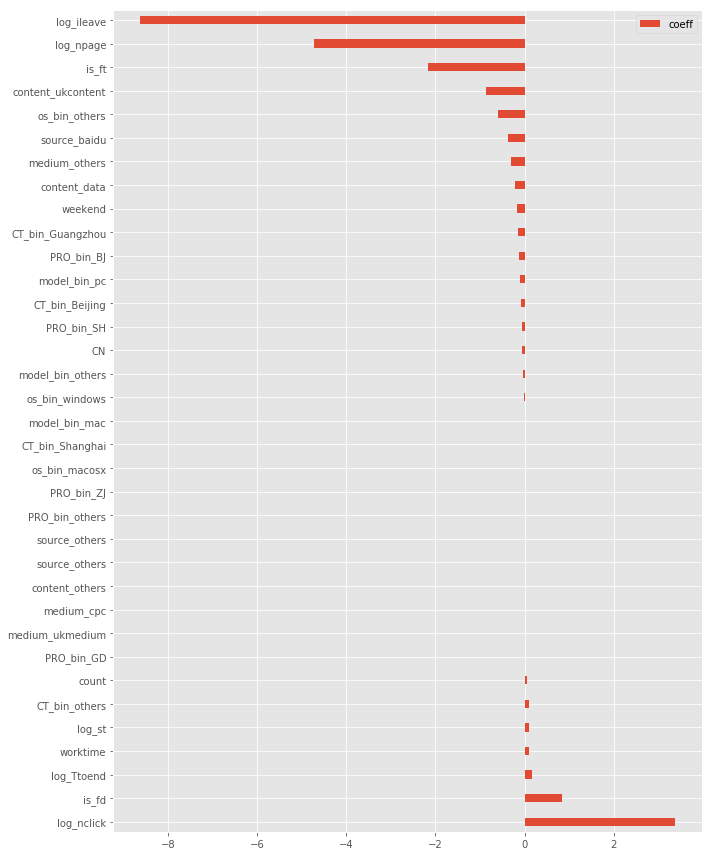

In [213]:
from pylab import rcParams
#plt.barh(y_pos, performance, align='center', alpha=0.5)
ax = df_coeffs.plot.barh(align='center',width=0.35)
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
rcParams['figure.figsize'] = 10, 12
plt.savefig('features.png',bbox_inches="tight",dpi=500)
plt.tight_layout()
plt.show()

### model evaluation

#### confusion matrix

In [181]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [182]:
confusion_matrix(y_test, y_test_pred)

array([[3352,   11],
       [ 116,   34]])

In [183]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[7809   39]
 [ 273   74]]


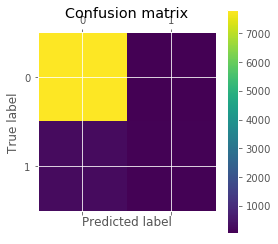

In [184]:
plot_confusion_matrix(y_train, y_train_pred)

[[3352   11]
 [ 116   34]]


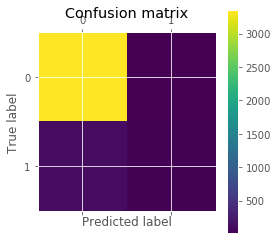

In [185]:
plot_confusion_matrix(y_test, y_test_pred)

In [186]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.6116978887897709


### Bagging
#### Single Tree

              train      test
metrics                      
AUC        0.995323  0.918908
Accuracy   0.985479  0.980074
Precision  0.880000  0.822581
Recall     0.760807  0.680000
f1-score   0.816074  0.744526


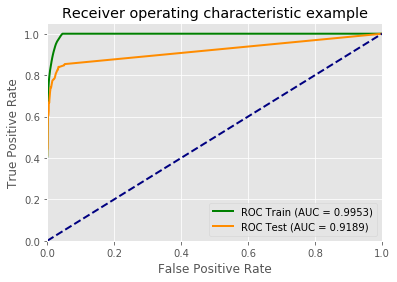

In [187]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [188]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Bagged Trees

              train      test
metrics                      
AUC        0.996693  0.978180
Accuracy   0.986455  0.984344
Precision  0.940299  0.943925
Recall     0.726225  0.673333
f1-score   0.819512  0.785992


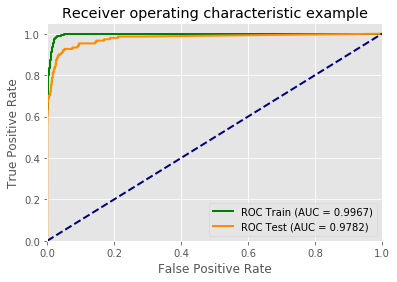

In [189]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

##### bagging is a very useful and effective methods for low amount of data points.

#### Single KNN

              train      test
metrics                      
AUC        0.987025  0.808249
Accuracy   0.975107  0.964133
Precision  0.878307  0.653846
Recall     0.478386  0.340000
f1-score   0.619403  0.447368


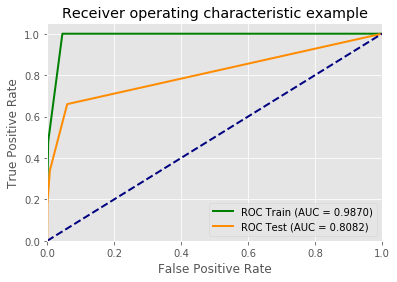

In [190]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.995417  0.882304
Accuracy   0.976083  0.963279
Precision  0.931429  0.656716
Recall     0.469741  0.293333
f1-score   0.624521  0.405530


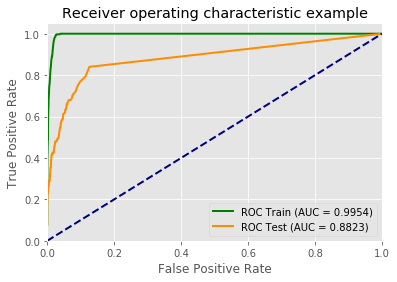

In [191]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.988645  0.972051
Accuracy   0.969494  0.968118
Precision  1.000000  1.000000
Recall     0.279539  0.253333
f1-score   0.436937  0.404255


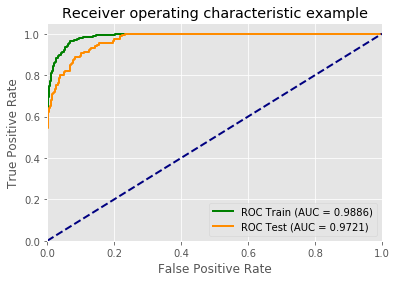

In [192]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.999997  0.989664
Accuracy   0.999268  0.984059
Precision  1.000000  0.879032
Recall     0.982709  0.726667
f1-score   0.991279  0.795620


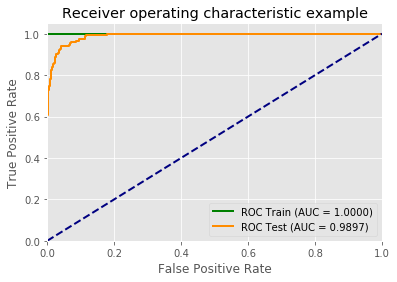

In [193]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [194]:
df_importance = pd.DataFrame(list(zip(selected_features, clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_importance.columns = ['feature', 'importance']
df_importance

,feature,importance
31,log_Ttoend,0.263551
3,log_st,0.193434
28,log_npage,0.172168
0,count,0.153803
29,log_nclick,0.073073
30,log_ileave,0.017195
4,model_bin_mac,0.013354
17,PRO_bin_ZJ,0.012546
18,PRO_bin_others,0.010454
25,medium_cpc,0.009560


### Neural Network

              train      test
metrics                      
AUC        0.993082  0.989034
Accuracy   0.986943  0.983205
Precision  0.931655  0.902655
Recall     0.746398  0.680000
f1-score   0.828800  0.775665


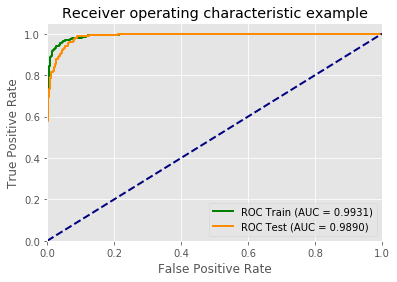

In [195]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM
#### Linear SVM

              train      test
metrics                      
AUC        0.767674  0.787300
Accuracy   0.963880  0.964703
Precision  0.576577  0.585526
Recall     0.553314  0.593333
f1-score   0.564706  0.589404


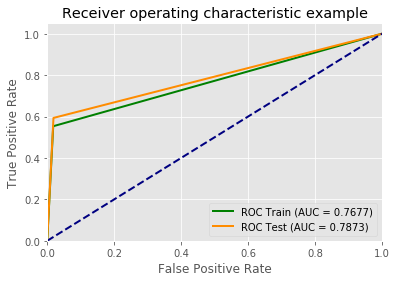

In [196]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

              train      test
metrics                      
AUC        0.988964  0.972228
Accuracy   0.988041  0.981782
Precision  0.952727  0.870690
Recall     0.755043  0.673333
f1-score   0.842444  0.759398


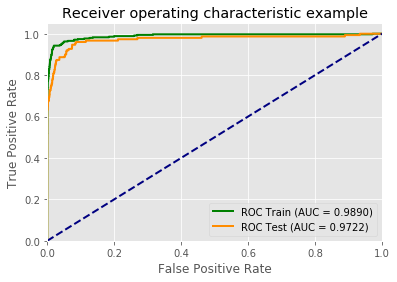

In [108]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.999963  0.978440
Accuracy   0.986333  0.976373
Precision  1.000000  1.000000
Recall     0.677233  0.446667
f1-score   0.807560  0.617512


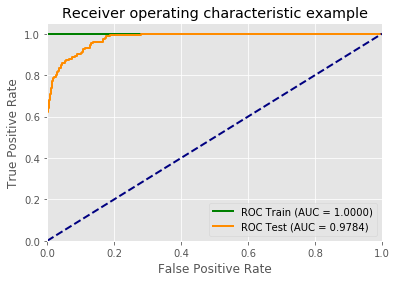

In [198]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)